<b>
<p>
<center>
<font size="5">
Regression of Used Car Prices
</font>
</center>
</p>

    
<p>
<center>
<font size="4">
Final Project
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Jin-Hyuk Son
Julio Montoya
Vaijayanti Deshmukh
</font>
</center>
</p>
</b>

# Introduction

The used car market has undergone significant fluctuations in recent years, influenced by factors such as supply chain disruptions, economic shifts, and evolving consumer demand. During the COVID-19 pandemic, production halts and semiconductor shortages led to a constrained supply of new vehicles, pushing consumers toward the used car market and driving up prices ([Semuels, 2024](https://time.com/6988412/car-prices-falling/)). According to a report by The Guardian, the average used car price in the U.S. rose to over $26,000, marking a nearly 40% increase since 2020 ([Chan, 2024](https://www.theguardian.com/business/2024/jan/29/us-car-costs-insurance-unaffordable)).​

These price surges have made vehicle ownership less attainable for many Americans, especially those relying on affordable transportation for employment and daily activities. The increased costs have also impacted insurance premiums and maintenance expenses, further burdening consumers. In this context, accurately predicting used car prices has become increasingly important for buyers, sellers, and industry stakeholders. Understanding how factors such as model year, mileage, engine size, brand, and vehicle condition influence resale values can inform better decision-making and pricing strategies.​

This project aims to develop predictive models for used car prices using [Regression of Used Car Prices](https://www.kaggle.com/competitions/playground-series-s4e9/data) datasets from Playground Series - Season 4, Episode 9 Kaggle competition and the original  [Used Car Price Prediction Dataset](https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset) derived from cars.com. The competition dataset was generated through a deep learning model trained on the original data, resulting in feature distributions that are similar but not identical to real-world listings.

Key research questions include:

*   How do car model year, mileage, and horsepower impact used car prices?
*   To what extent does car brand affect resale price?
*   What factors are most influential in predicting used car prices?
*   Can we segment used cars into meaningful clusters based on their pricing-related features?​

By addressing these questions, the study seeks to uncover critical insights into the factors shaping used car valuations and to develop predictive models that can accurately estimate car prices based on their characteristics.

# About the Data

The training set contains around 190,000 records, and the test set contains around 130,000 records. The target variable is “price”, which represents the estimated resale price of the vehicle in U.S. dollars. Key predictor variables include:
* brand: The manufacturer of the car (e.g., Toyota, Ford, BMW).
* model: The specific model name under the brand.
* model_year: The year the vehicle was manufactured, indicating its age.
* mileage: The number of miles the car has been driven, typically inversely related to price.
* fuel_type: The type of fuel the car uses (e.g., gasoline, diesel, electric).
* engine: The engine description, which may include size or configuration.
* transmission: The type of transmission system (e.g., automatic, manual).
* ext_col: The color of the vehicle’s exterior, which can affect buyer preference.
* int_col: The color of the vehicle’s interior.
* accident: Indicates whether the car has a history of accidents (yes/no).
* clean_title: A binary indicator of whether the car has a clean title without legal or insurance issues.

The dataset contains a mix of numerical and categorical variables, allowing for a comprehensive analysis of how technical specifications, vehicle history, and visual factors influence used car prices.


## Notebook Configuration

### Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/final_project/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/code/models/p2_shallow_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

### Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

### TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

## Loading the data

In [ ]:
import pandas as pd

# Load the raw training data
df_raw_train = pd.read_csv(abspath_curr + 'data/train/train.csv',
                           header=0)
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = pd.read_csv(abspath_curr + '/data/test/test.csv',
                          header=0)
# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'price'

Following are the exact dimensions of the datasets.
* Train:

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,188533,13


* Test:

In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,125690,12


An initial snapshot of the dataset is shown below:

In [ ]:
df_train = df_train.rename(columns={'milage': 'mileage'})
df_test=df_test.rename(columns={'milage': 'mileage'})
# Print the first 5 rows of df_test
df_test.head()

,id,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


## Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/code/utilities/p2_shallow_learning


Before preprocessing the data, we have first looked at the key statistics for several important features, including id, model_year, mileage, and price. The model_year ranges from 1974 to 2024, with a median year of 2017, suggesting the dataset includes a mix of older and relatively new vehicles. Mileage varies widely, from as low as 100 miles to as high as 405,000 miles, with a median mileage of approximately 57,785 miles. This highlights the considerable variation in car usage across listings. The price of vehicles spans a large range, starting at 2,000 and reaching up to over 2.95 million dollars, though the median price is about 30,825, indicating that while there are some extremely high-priced outliers, most vehicles are moderately priced. Overall, the data shows substantial variability across key features like mileage and price, which will be important to consider during model building, especially in terms of handling outliers and scaling.

In [ ]:
df_train.describe().style.format("{:.2f}")

,id,model_year,mileage,price
count,188533.00,188533.00,188533.00,188533.00
mean,94266.00,2015.83,65705.30,43878.02
std,54424.93,5.66,49798.16,78819.52
min,0.00,1974.00,100.00,2000.00
25%,47133.00,2013.00,24115.00,17000.00
50%,94266.00,2017.00,57785.00,30825.00
75%,141399.00,2020.00,95400.00,49900.00
max,188532.00,2024.00,405000.00,2954083.00


We have further visualized the price distribution of cars using a histogram and a box plot. From the graphs, we can observe that current distribution of price is extremely right-skewed.

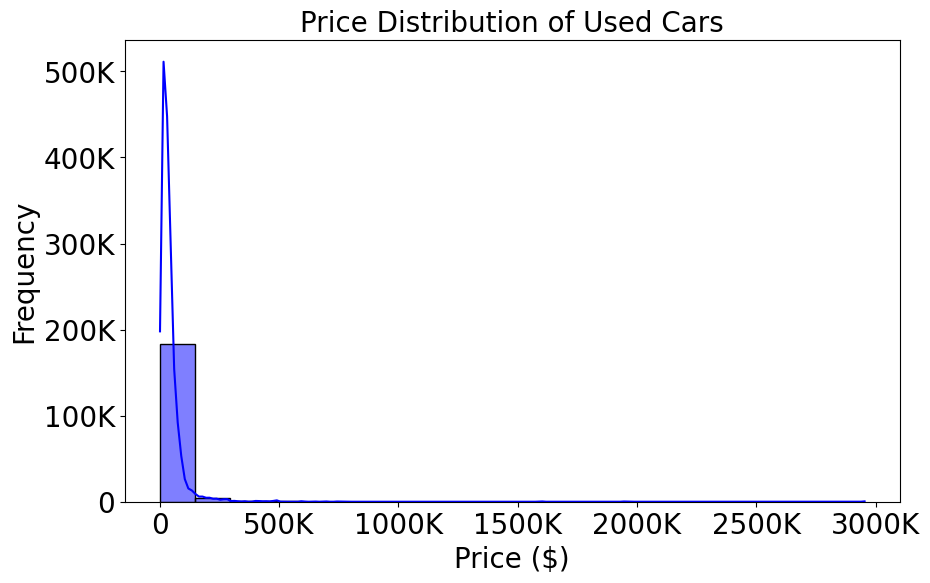

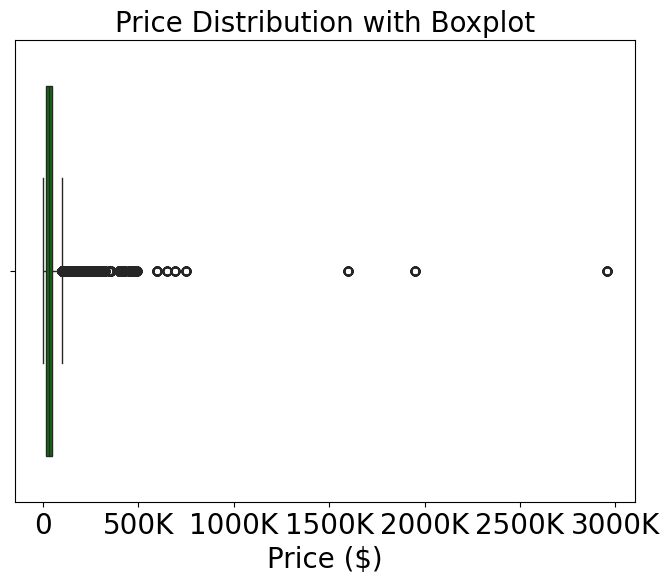

In [ ]:
# EDA Analysis
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format y-axis labels (e.g., 500000 → 500K)
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K' if x >= 1000 else str(int(x))


# 1. Histogram to show the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df_train['price'], bins=20, kde=True, color='blue')
plt.title('Price Distribution of Used Cars')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Format both axes
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.show()

# 2. Boxplot to detect outliers in the price data
plt.figure(figsize=(8,6))
sns.boxplot(x=df_train['price'], color='green')
plt.title('Price Distribution with Boxplot')
plt.xlabel('Price ($)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.show()

To focus on a more typical range of used cars and reduce the influence of extreme outliers, we decided to filter the dataset to only include vehicles priced at $90,000 or below. After this filtering, the dataset contains 174,935 entries.

The updated summary statistics are shown below. The model_year still ranges from 1974 to 2024, with a median year of 2017, similar to the original data.Mileage remains widely spread, from 100 miles to 405,000 miles, with a median mileage of approximately 61,600 miles, slightly higher than before. Price now spans from 2,000 to 90,000 dollars, with a median price of 28,998 and an average price of around 32,450. This narrower range better reflects the typical used car market.

Overall, filtering out the highest-priced vehicles helped the dataset become more concentrated around realistic price points for used cars, which should improve the stability and reliability of the predictive models.

In [ ]:
df_train = df_train[df_train["price"] <= 90000]
df_train.describe()

,id,model_year,mileage,price
count,174935.000000,174935.000000,174935.000000,174935.000000
mean,94293.852694,2015.518598,69317.040226,32450.193403
std,54419.822204,5.652081,49445.132955,20141.869938
min,0.000000,1974.000000,100.000000,2000.000000
25%,47214.500000,2012.000000,28182.000000,16000.000000
50%,94256.000000,2017.000000,61600.000000,28998.000000
75%,141438.500000,2020.000000,98413.000000,44900.000000
max,188532.000000,2024.000000,405000.000000,90000.000000


The histogram and boxplot for price are still some what right skewed but much less extreme than before. Overall, the data now looks more typical for used cars, with fewer extreme outliers, making it better for analysis and model building.

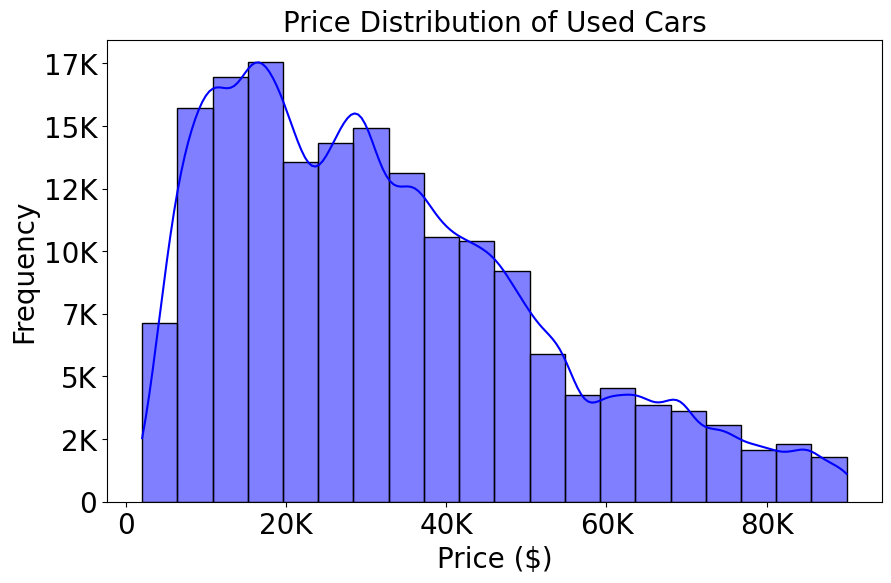

In [ ]:
# 1. Histogram to show the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df_train['price'], bins=20, kde=True, color='blue')
plt.title('Price Distribution of Used Cars')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Format both axes
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.show()

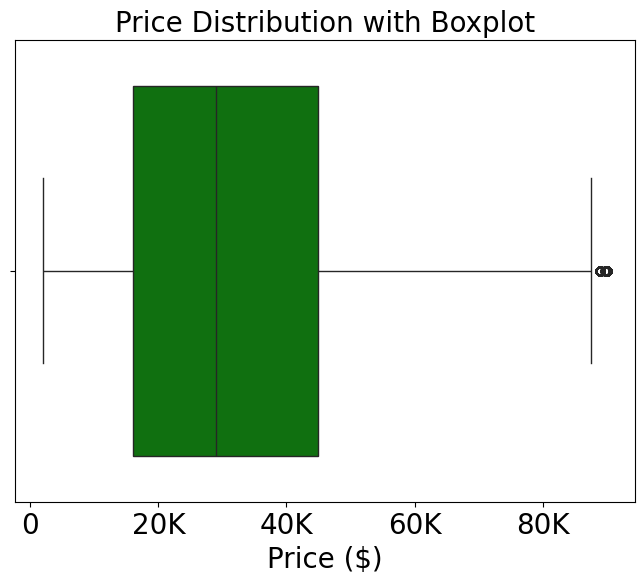

In [ ]:
# 2. Boxplot to detect outliers in the price data
plt.figure(figsize=(8,6))
sns.boxplot(x=df_train['price'], color='green')
plt.title('Price Distribution with Boxplot')
plt.xlabel('Price ($)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.show()

##Feature Engineering

We performed feature engineering to prepare the dataset for analysis and modeling. These transformations help improve the quality of the data, making it easier to extract meaningful insights and improve model performance. Below are the key steps involved:

1.   Brand Category Classification:
To categorize car brands into meaningful groups, we used predefined lists of luxury, regular, and exotic brands. A dictionary mapping each brand to its respective category (luxury, regular, or exotic) was created. The “brand” column in the dataset was then mapped to a new column, “Brand Category”, using this dictionary. If the brand was not found in any of the lists, it was classified as “Unknown”.




In [ ]:
#Brand Categories
luxury_brands = [
    "Acura", "Mercedes-Benz", "BMW", "Cadillac", "Volvo", "Genesis", "Tesla",
    "Jaguar", "MINI", "INFINITI", "Lexus", "Bentley", "Rolls-Royce", "Aston",
    "Lotus", "Ferrari", "Maserati", "Buick", "Lucid", "Audi", "Land", "Alfa","Maybach","Karma"
]

regular_brands = [
    "RAM", "Jeep", "Chevrolet", "Ford", "Toyota", "Dodge", "Nissan", "GMC",
    "Volkswagen", "Kia", "Hyundai", "Subaru", "Chrysler", "Saturn", "Mitsubishi",
    "Honda", "Mazda", "Lincoln", "Pontiac", "FIAT", "Scion", "Mercury","Saab","Suzuki","Plymouth","Polestar","smart"
]

exotic_brands = [
    "Lamborghini", "Porsche", "McLaren", "Rivian", "Hummer","Bugatti"
]

# 2. Create a brand → category dictionary
brand_category_map = {brand: 'Luxury' for brand in luxury_brands}
brand_category_map.update({brand: 'Regular' for brand in regular_brands})
brand_category_map.update({brand: 'Exotic' for brand in exotic_brands})

# 3. Create a new column using .map()
df_train['Brand Category'] = df_train['brand'].map(brand_category_map).fillna('Unknown')
df_test['Brand Category'] = df_test['brand'].map(brand_category_map).fillna('Unknown')

In [ ]:
Brand_cat_counts = df_train["Brand Category"].value_counts()
print(Brand_cat_counts)

Brand Category
Regular    84148
Luxury     80982
Exotic      9805
Name: count, dtype: int64


2.   Transmission Type Categorization:
We classified the transmission type as either "A/T" (automatic) or "M/T" (manual) based on keywords in the “transmission” column.




In [ ]:
Automatic_words = ["A/T", "Automatic", "Dual", "CVT"]
Manual_words = ["M/T", "Manual"]

def categorize_transmission(transmission):
    transmission = str(transmission)
    if any(keyword in transmission for keyword in Automatic_words):
        return "A/T"
    elif any(keyword in transmission for keyword in Manual_words):
        return "M/T"
    else:
        return "Unknown"

df_train["Transmission"] = df_train["transmission"].apply(categorize_transmission)

df_test["Transmission"] = df_test["transmission"].apply(categorize_transmission)

In [ ]:
#Eliminate Unknown
df_train = df_train.drop(df_train[df_train['Transmission'] == 'Unknown'].index)
df_test = df_test.drop(df_test[df_test['Transmission'] == 'Unknown'].index)

In [ ]:
transmission_counts = df_train["Transmission"].value_counts()
print(transmission_counts)

Transmission
A/T    158837
M/T     15573
Name: count, dtype: int64


3.   We have removed rows with unrecognized values in the fuel type column.


In [ ]:
# Get indices of rows to drop in Fuel_type
indices_to_drop_train = df_train[df_train['fuel_type'].isin(['â€“', 'not supported','–'])].index
indices_to_drop_test = df_test[df_test['fuel_type'].isin(['â€“', 'not supported','–'])].index
# Drop these rows
df_train = df_train.drop(indices_to_drop_train)
df_test = df_test.drop(indices_to_drop_test)

In [ ]:
fuel_type_counts = df_train["fuel_type"].value_counts()
print(fuel_type_counts)

fuel_type
Gasoline          153715
Hybrid              6079
E85 Flex Fuel       5284
Diesel              3699
Plug-In Hybrid       505
Name: count, dtype: int64


4. Engine Details Extraction:
To extract meaningful features from the engine column, we used regular expressions to identify and extract information such as horsepower, engine size, and the number of cylinders. These details were extracted into separate columns: horsepower, engine_size, and cylinders.



In [ ]:
import re

def extract_engine_details(engine_str):
    # Extract horsepower using regex, handle missing matches
    horsepower_match = re.search(r'(\d+\.?\d*)HP', engine_str)
    horsepower = float(horsepower_match.group(1)) if horsepower_match else None

    # Extract engine size using regex, handle missing matches
    engine_size_match = re.search(r'(\d+\.?\d*)L', engine_str)
    engine_size = float(engine_size_match.group(1)) if engine_size_match else None

    # Extract cylinder information (e.g., 4, V6, V8), handle missing matches
    cylinder_match = re.search(r'(\d+|V6|V8) Cylinder', engine_str)
    if cylinder_match:
        cylinders = cylinder_match.group(1)
        if cylinders in ['V6', 'V8']:  # Handle V6, V8, etc.
            cylinders = int(cylinders[1])  # Convert 'V6' to 6, 'V8' to 8
        else:
            cylinders = int(cylinders)  # Convert number string to int
    else:
        cylinders = None  # If no match found

    return pd.Series([horsepower, engine_size, cylinders])

# Apply the extraction function and create new columns
df_train[['horsepower', 'engine_size', 'cylinders']] = df_train['engine'].apply(extract_engine_details)
df_test[['horsepower', 'engine_size', 'cylinders']] = df_test['engine'].apply(extract_engine_details)

df_train.head()

,id,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Brand Category,Transmission,horsepower,engine_size,cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,Luxury,A/T,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,Regular,A/T,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,Regular,A/T,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,Luxury,A/T,420.0,5.0,8.0
5,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950,Luxury,A/T,252.0,2.0,4.0


In [ ]:

summary = df_train.describe()

def format_with_commas(x):
    if isinstance(x, (int, float)):
        return f"{x:,.2f}"
    return x

styled_summary = summary.applymap(format_with_commas).style \
    .set_caption("<b>Descriptive Statistics</b>") \
    .set_table_styles([{
        'selector': 'th',
        'props': [('font-weight', 'bold'),
                 ('background-color', '#f0f0f0'),
                 ('border', '1px solid white')]
    }]) \
    .set_properties(**{
        'text-align': 'center',
        'border': '1px solid #f0f0f0'
    }) \
    .background_gradient(cmap='Blues', axis=None) \
    .format(precision=2, thousands=",")

display(styled_summary)

,id,model_year,mileage,price,horsepower,engine_size,cylinders
count,"173,678.00","173,678.00","173,678.00","173,678.00","145,639.00","162,056.00","141,687.00"
mean,"94,296.04","2,015.55","69,242.93","32,489.81",335.49,3.77,6.33
std,"54,424.19",5.58,"49,387.48","20,145.49",109.68,1.36,1.54
min,0.00,"1,974.00",100.00,"2,000.00",70.00,0.65,3.00
25%,"47,212.25","2,012.00","28,121.00","16,000.00",260.00,3.00,6.00
50%,"94,258.50","2,017.00","61,549.00","28,999.00",320.00,3.50,6.00
75%,"141,449.75","2,020.00","98,400.00","44,900.00",400.00,4.70,8.00
max,"188,532.00","2,024.00","405,000.00","90,000.00","1,020.00",8.40,12.00


5. Model Category Classification:
We used keyword-based classification to categorize car models into three categories: "Premium", "Performance", and "Normal". Keywords associated with premium and performance models were predefined. The model column was processed to create the Model Category column using these predefined lists.


In [ ]:
# Define model categories:

premium_keywords = [
    "Premium", "Technology", "Tech", "Advance", "Touring", "A-Spec", "Platinum","Prestige",
    "Limited", "Elite", "Signature", "Reserve", "Luxury", "Essence", "SEL", "Titanium","R8"
]

performance_keywords = [
    "Type S", "Sport", "M", "AMG", "SRT", "GT", "STI", "N Line", "Hellcat",
    "Trackhawk", "Z06", "ZR1", "PMC", "RS", "V-Series", "NISMO"
]

def categorize_model(model):
    model = model.lower()
    if any(keyword.lower() in model for keyword in premium_keywords):
        return "Premium"
    elif any(keyword.lower() in model for keyword in performance_keywords):
        return "Performance"

    else:
        return "Normal"

df_train["Model Category"] = df_train["model"].apply(categorize_model)

df_test["Model Category"] = df_test["model"].apply(categorize_model)


6. We have removed rows with missing or unrecognizable values in the accident and clean title columns.

In [ ]:
df_train.dropna(subset=['accident'], inplace=True)
df_train.reset_index(drop=True, inplace=True)

df_test.dropna(subset=['accident'], inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [ ]:
df_train['clean_title'] = np.where(df_train['accident'] == 'None reported', 'Yes', 'No')
df_test['clean_title'] = np.where(df_test['accident'] == 'None reported', 'Yes', 'No')

In [ ]:
clean_title_counts = df_train["clean_title"].value_counts()
print(clean_title_counts)

clean_title
Yes    130957
No      40556
Name: count, dtype: int64


7. External and Interior Color Standardization:
To standardize the external and interior color information, we applied rules to categorize various color descriptions into broader categories. The ext_col and int_col columns were processed using functions that mapped different color variants (e.g., different shades of blue, gray, etc.) to standardized color names.


In [ ]:

def standardize_external_color(color):
    color = str(color).lower().strip()

    if 'red' in color:
        return 'Red'
    elif 'blue' in color:
        return 'Blue'
    elif 'green' in color:
        return 'Green'
    elif 'yellow' in color:
        return 'Yellow'
    elif 'silver' in color:
        return 'Silver'
    elif 'black' in color:
        return 'Black'
    elif 'white' in color:
        return 'White'
    elif 'gray' in color or 'grey' in color:
        return 'Gray'
    else:
        return 'Other'

df_train['standardized_external_color'] = df_train['ext_col'].apply(standardize_external_color)
df_test['standardized_external_color'] = df_test['ext_col'].apply(standardize_external_color)

In [ ]:

def standardize_interior_color(color):
    color = str(color).lower().strip()

    if 'red' in color:
        return 'Red'
    elif 'blue' in color:
        return 'Blue'
    elif 'beige' in color:
        return 'Beige'
    elif 'yellow' in color:
        return 'Yellow'
    elif 'camel' in color:
        return 'Silver'
    elif 'black' in color:
        return 'Black'
    elif 'white' in color:
        return 'White'
    elif 'brown' in color:
        return 'Brown'
    elif 'gray' in color or 'grey' in color:
        return 'Gray'
    else:
        return 'Other'


df_train['standardized_interior_color'] = df_train['int_col'].apply(standardize_interior_color)
df_test['standardized_interior_color'] = df_test['int_col'].apply(standardize_interior_color)

After simplifying the features through feature engineering, we have removed older features that contained too many categories.

In [ ]:
# Remove features from df
df_train = df_train.drop(columns=['model','engine','ext_col','int_col','brand','transmission'])
df_test = df_test.drop(columns=['model','engine','ext_col','int_col','brand','transmission'])

#Considering that clean and accident are correlated and have the same meaning we remove also accident
df_train= df_train.drop(columns=['accident'])
df_test= df_test.drop(columns=['accident'])
df_train.head()

,id,model_year,mileage,fuel_type,clean_title,price,Brand Category,Transmission,horsepower,engine_size,cylinders,Model Category,standardized_external_color,standardized_interior_color
0,0,2007,213000,Gasoline,Yes,4200,Luxury,A/T,172.0,1.6,4.0,Normal,Yellow,Gray
1,1,2002,143250,Gasoline,No,4999,Regular,A/T,252.0,3.9,8.0,Normal,Silver,Beige
2,2,2002,136731,E85 Flex Fuel,Yes,13900,Regular,A/T,320.0,5.3,8.0,Normal,Blue,Gray
3,3,2017,19500,Gasoline,Yes,45000,Luxury,A/T,420.0,5.0,8.0,Performance,Black,Black
4,5,2018,40950,Gasoline,Yes,29950,Luxury,A/T,252.0,2.0,4.0,Performance,White,Other


We created a pairplot to visualize relationships between key numerical features, such as model_year, mileage, and horsepower. This helped in identifying potential patterns and interactions between variables. Additionally, we generated a correlation matrix to quantify these relationships. Notable correlations include:

* Model Year with price (0.63), indicating a positive relationship where newer cars tend to have higher prices.
* Mileage with price (-0.65), showing a negative correlation, meaning cars with higher mileage typically have lower prices.
* Horsepower with price (0.54), suggesting that cars with more horsepower tend to be priced higher.

These correlations provide valuable insights that can inform our predictive modeling approach.

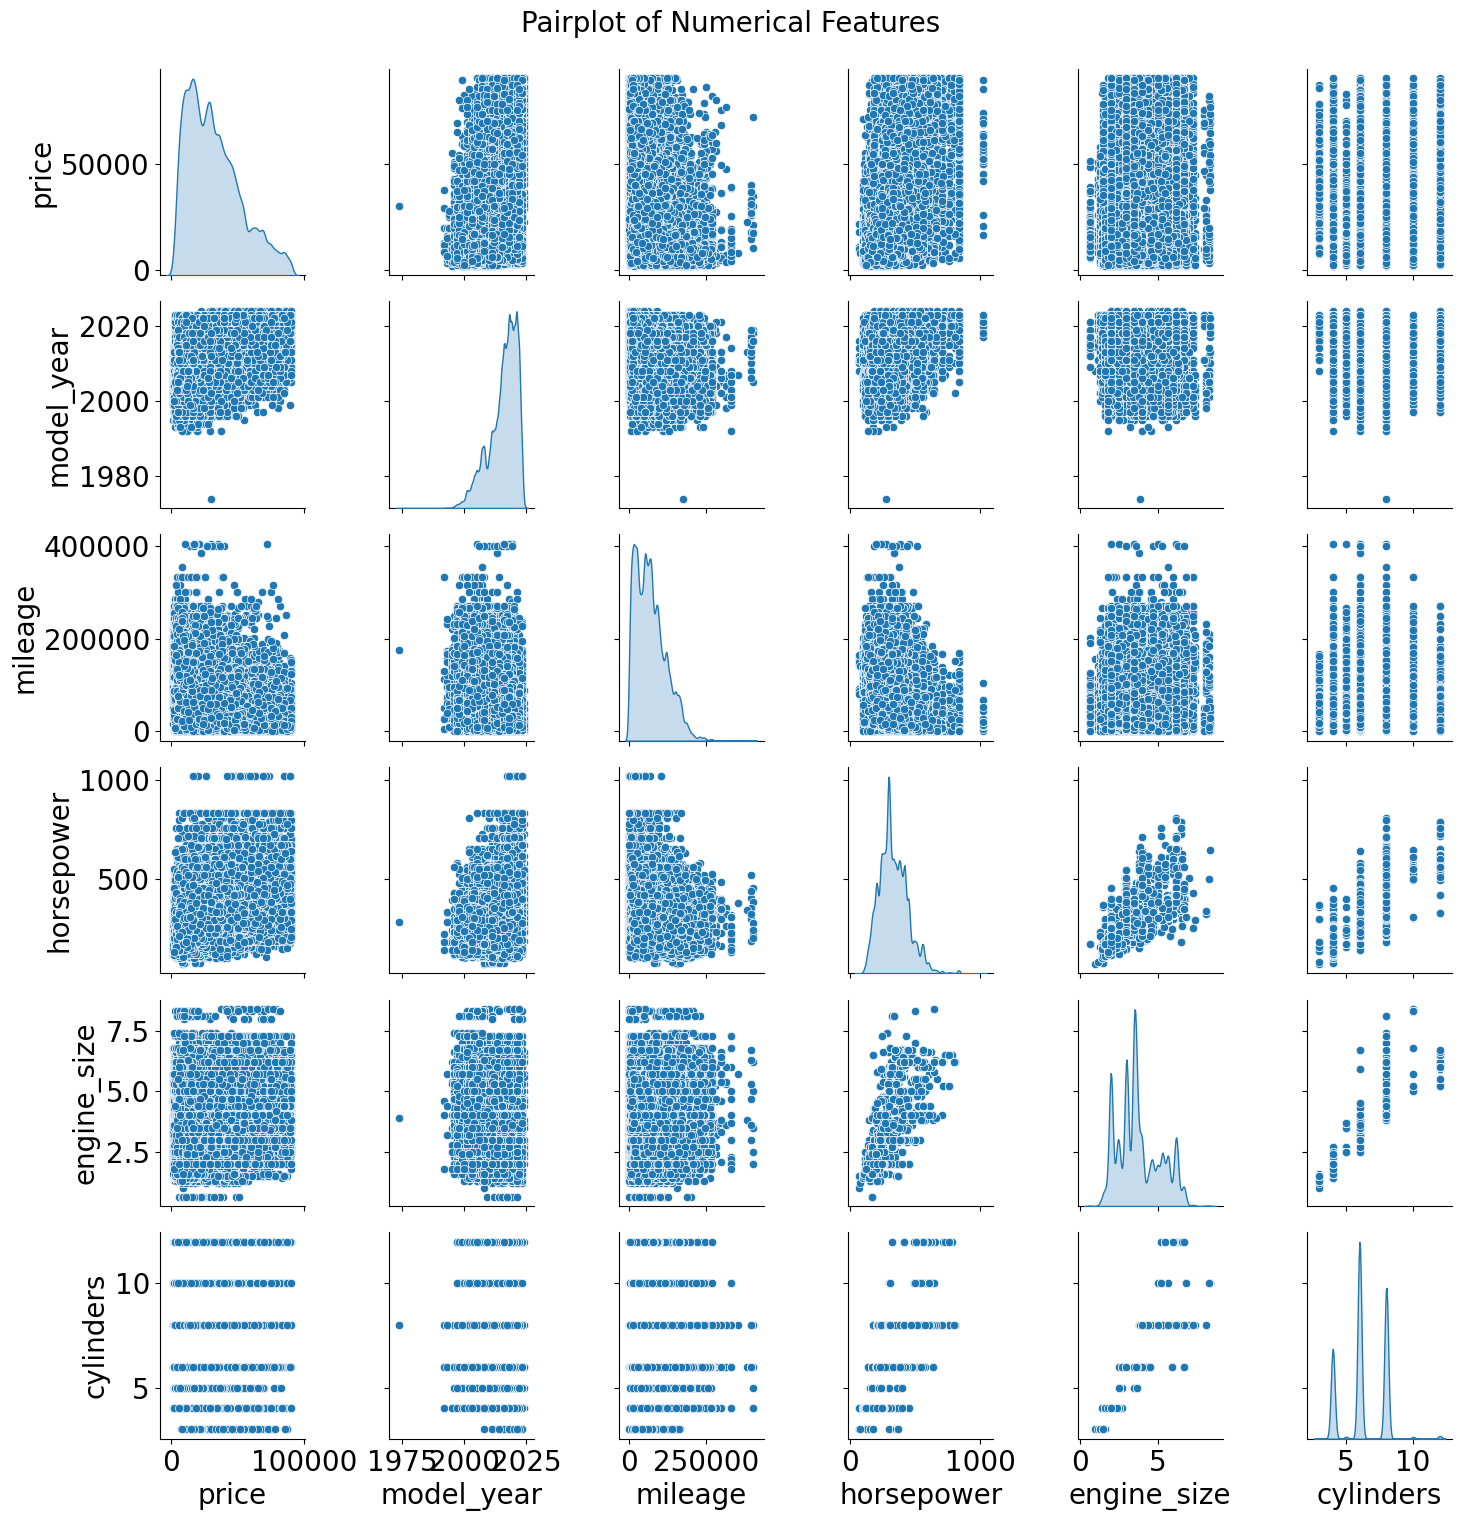

In [ ]:
# Only use numerical features for pairplot
numerical_features = ['price', 'model_year', 'mileage', 'horsepower', 'engine_size', 'cylinders']
sns.pairplot(df_train[numerical_features], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

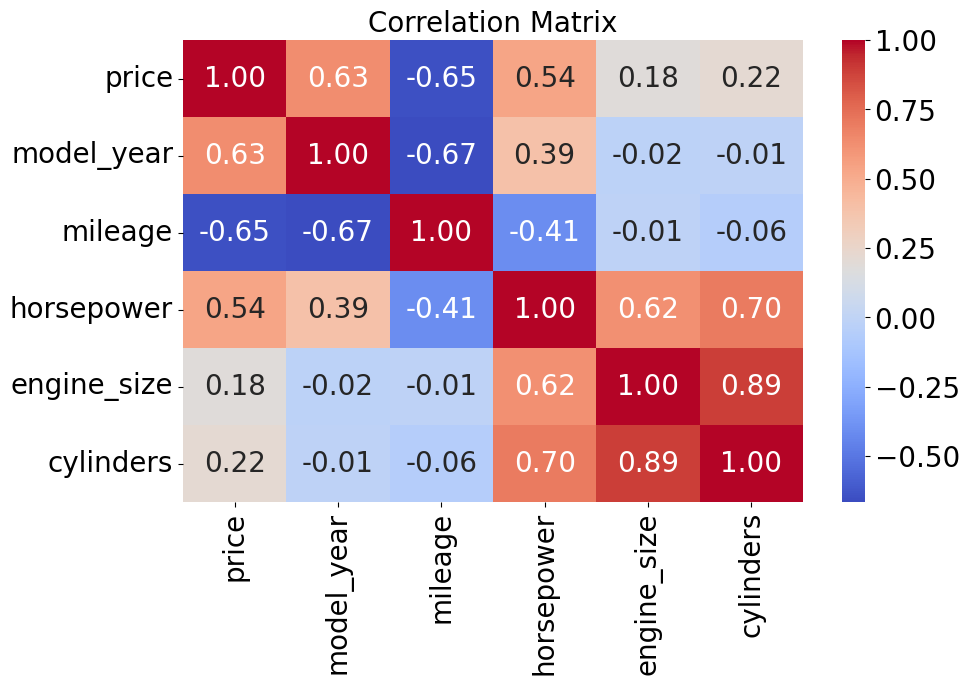

In [ ]:
numerical_features = ['price', 'model_year', 'mileage', 'horsepower', 'engine_size', 'cylinders']
correlation_matrix = df_train[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##EDA Analysis

To better understand the dataset, we performed exploratory data analysis (EDA) by separating the numerical and categorical variables. For numerical features, we created pair plots to visualize relationships between variables and to see how they relate to the price. For categorical features, we used bar charts and violin plots to explore how different categories, such as car brands and colors, affect the distribution of prices.

###Numerical Variables

From the pair plots, we found several key patterns in the data. Cars with lower prices tend to have higher mileage and are generally older, while higher-priced cars are newer with lower mileage. Medium-priced cars are more spread out but still show a similar trend. We also observed that newer cars with higher horsepower are associated with higher prices, while older cars with lower horsepower are linked to lower prices. Mileage and horsepower together show that cars with low mileage and high horsepower are priced higher, whereas cars with high mileage and low horsepower are priced lower. On the other hand, there was no strong pattern between engine size and either model year or mileage.

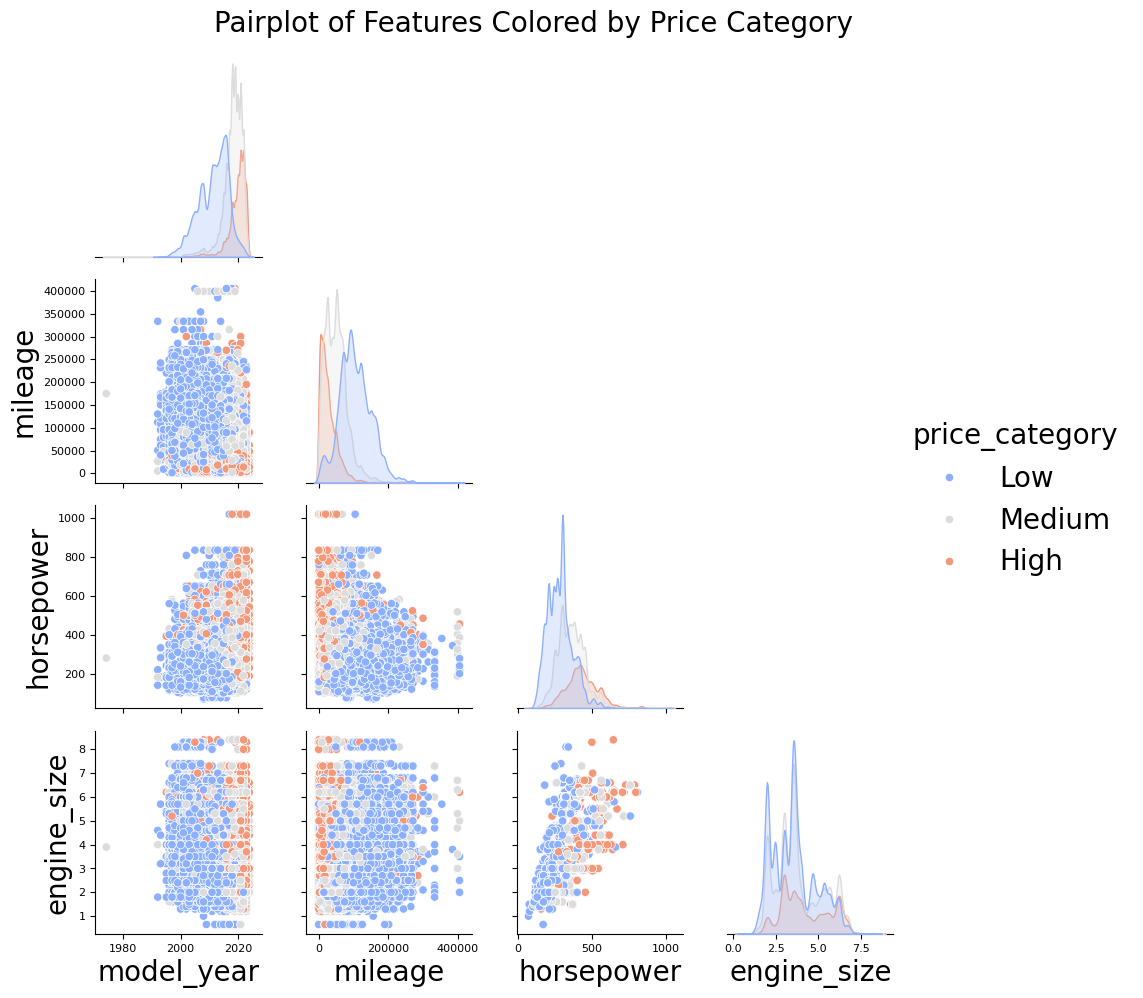

In [ ]:
#Creating Bins for better analysis of Price
bins = [0, 25000, 50000, float('inf')]
labels = ['Low', 'Medium', 'High']
df_train['price_category'] = pd.cut(df_train['price'], bins=bins, labels=labels, include_lowest=True)

features = ['model_year', 'mileage', 'horsepower', 'engine_size', 'price_category']


g = sns.pairplot(df_train[features], hue='price_category', palette='coolwarm', diag_kind='kde', corner=True)

for ax in g.axes.flat:
    if ax is not None:
        ax.tick_params(labelsize=8)

plt.suptitle("Pairplot of Features Colored by Price Category", y=1.02)
plt.show()

###Categorical Variables

When analyzing the brand category, we found that exotic cars have the highest average prices, reaching close to $40,000. Luxury cars come next, followed by regular brands with the lowest average prices. The violin plots show that for all three categories, the distribution is more concentrated at the lower end, indicating more lower-priced cars. However, as we move from regular to exotic brands, the upper end of the distribution becomes more expanded, showing a greater density of higher-priced cars among exotic brands.

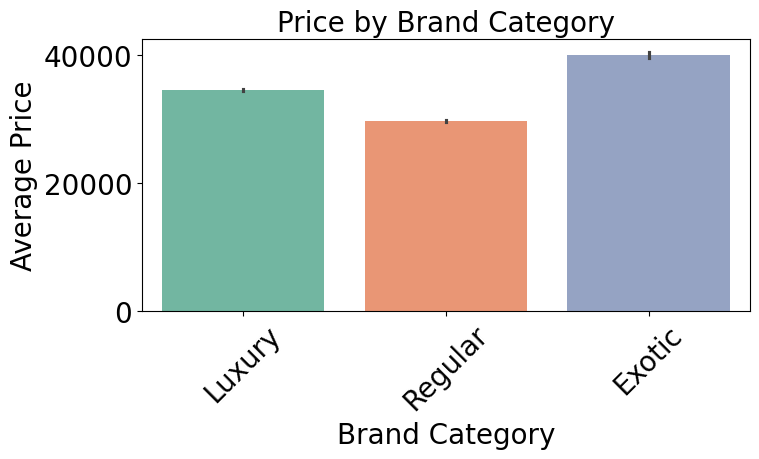

In [ ]:
#Price by brand category
plt.figure(figsize=(8, 5))
sns.barplot(data=df_train, x='Brand Category', y='price', palette='Set2')
plt.ylabel('Average Price')
plt.title('Price by Brand Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

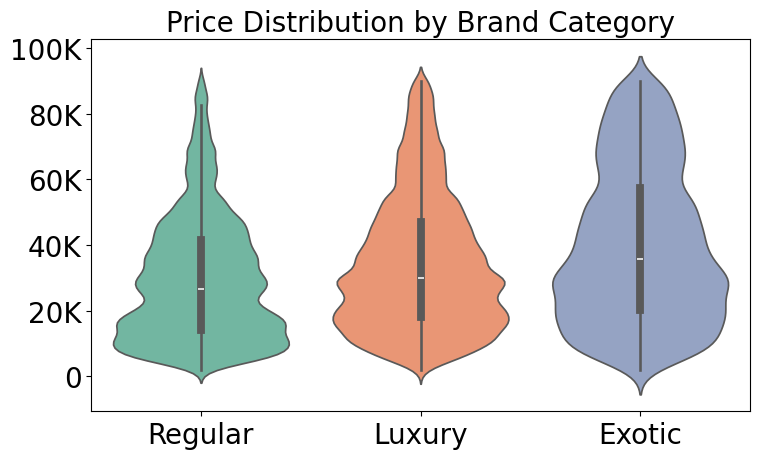

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

# Generating Violin plot
sns.violinplot(data=df_train, x='Brand Category', y='price', ax=ax, palette='Set2', order=['Regular', 'Luxury', 'Exotic'])
ax.set_title('Price Distribution by Brand Category')
ax.set_xlabel('')
ax.set_ylabel('')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.tight_layout()
plt.show()

We observed a similar pattern in the model category, moving from normal to premium to performance models. In both the bar charts and violin plots, the average price increases across these groups, just like with the brand category. The violin plots show that the lower-priced cars are more concentrated at the bottom for all three model types, but the middle and higher-end of the distribution becomes more expanded as we move from normal to premium to performance models.

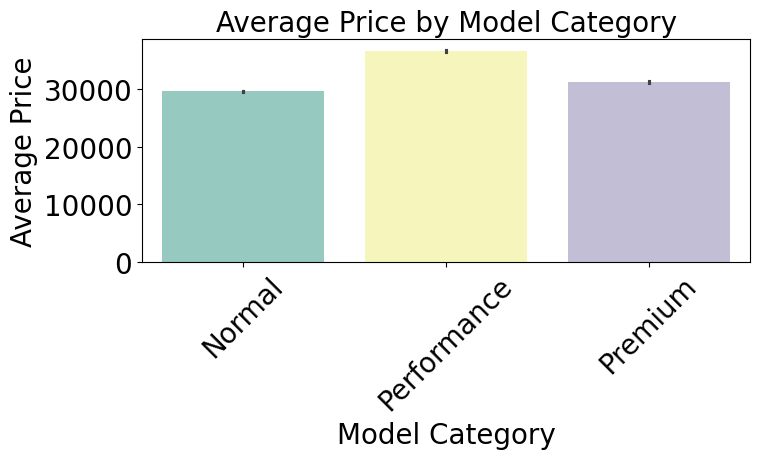

In [ ]:
#Average price by model category
plt.figure(figsize=(8, 5))
sns.barplot(data=df_train, x='Model Category', y='price', palette='Set3')
plt.title('Average Price by Model Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

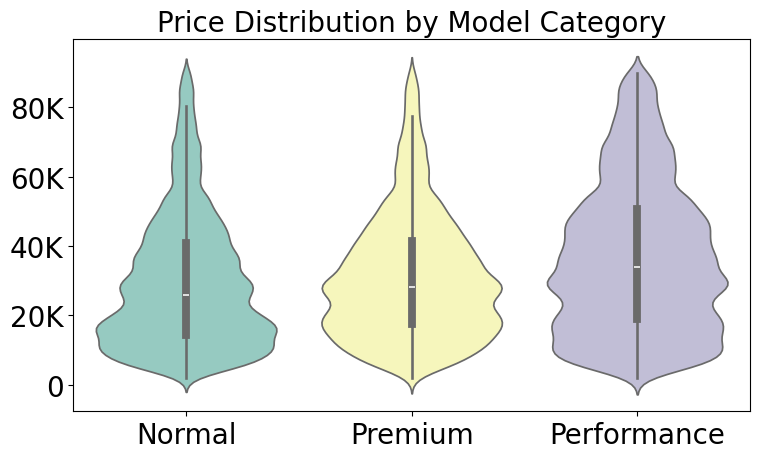

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

# Violin plot
sns.violinplot(data=df_train, x='Model Category', y='price', ax=ax, palette='Set3', order=['Normal','Premium','Performance'])
ax.set_title('Price Distribution by Model Category')
ax.set_xlabel('')
ax.set_ylabel('')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.tight_layout()
plt.show()

The analysis of the exterior color category showed that cars with gray exteriors had the highest average price, followed by blue, black, white, and green. The violin plots revealed that black, white, gray, and blue cars had a more even distribution of prices across different ranges. In contrast, other colors generally showed lower price distributions, with only a small, thin spread extending into the higher price ranges, indicating that high-priced cars in these colors are much less common.

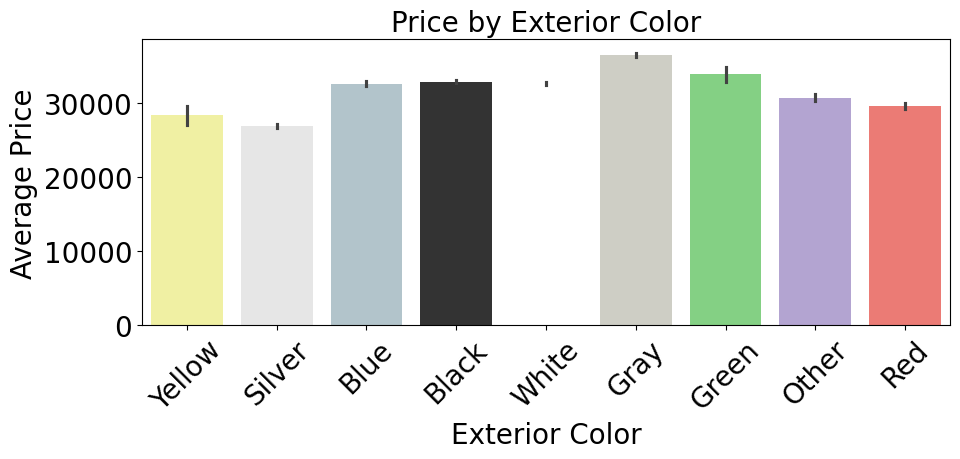

In [ ]:
#Exterior color analysis

pastel_colors = [
    '#FDFD96',   # yellow (pastel)
    '#E6E6E6',   # silver (light)
    '#AEC6CF',   # blue (pastel)
    '#333333',   # black (actual dark color)
    '#FFFFFF',   # white (pure white)
    '#CFCFC4',   # gray (pastel)
    '#77DD77',   # green (pastel)
    '#B19CD9',   # purple (pastel)
    '#FF6961',   # red (pastel)
]

plt.figure(figsize=(10, 5))
sns.barplot(data=df_train, x='standardized_external_color', y='price', palette=pastel_colors)
plt.title('Price by Exterior Color')
plt.ylabel('Average Price')
plt.xlabel('Exterior Color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

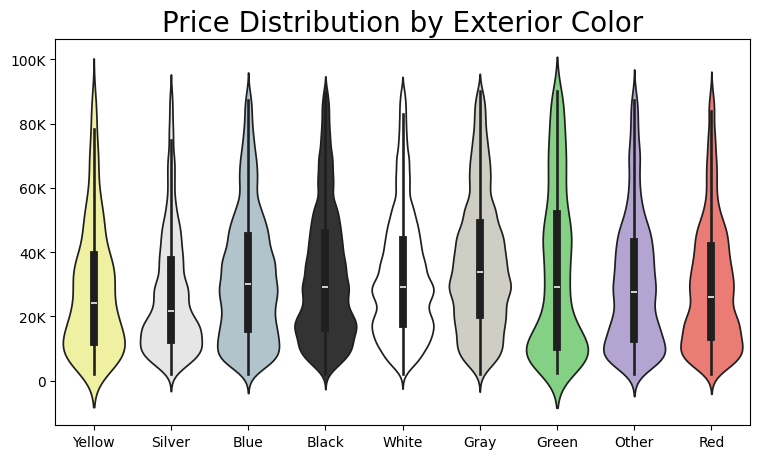

In [ ]:

fig, ax = plt.subplots(figsize=(8, 5))

pastel_colors = [
    '#FDFD96',   # yellow (pastel)
    '#E6E6E6',   # silver (light)
    '#AEC6CF',   # blue (pastel)
    '#333333',   # black (actual dark color)
    '#FFFFFF',   # white (pure white)
    '#CFCFC4',   # gray (pastel)
    '#77DD77',   # green (pastel)
    '#B19CD9',   # purple (pastel)
    '#FF6961',   # red (pastel)
]

# Generating Violin plot with custom colors
sns.violinplot(
    data=df_train,
    x='standardized_external_color',
    y='price',
    ax=ax,
    palette=pastel_colors  # Use custom colors instead of a palette
)

ax.set_title('Price Distribution by Exterior Color')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', labelsize=10)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.tight_layout()
plt.show()

For the interior color category, cars with silver interiors had the highest average price, followed by white and red interiors. The violin plots showed that blue, white, red, and brown interiors had relatively even distributions across different price ranges. Silver interiors displayed a concentration of cars in the lower to mid-price range, with a thinner spread at the high end; however, overall prices for silver interiors remained high compared to other colors. In contrast, gray and beige interiors were generally associated with lower prices.

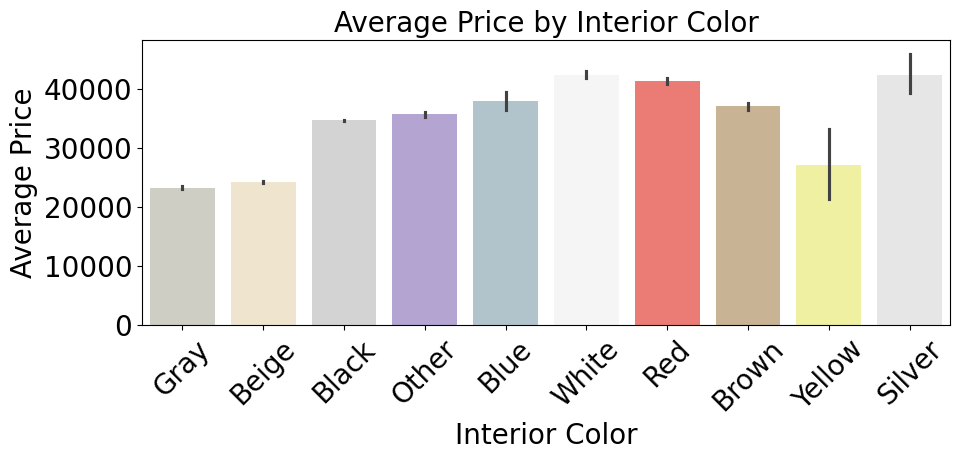

In [ ]:
pastel_colors = [

    '#CFCFC4',  # gray → warm pastel
    '#F5E6C8',  # beige → soft sand
    '#D3D3D3',  # black → light gray
    '#B19CD9',  # purple → lavender
    '#AEC6CF',  # blue → powder
    '#F5F5F5',  # white → off-white
    '#FF6961',  # red → coral
    '#D2B48C',  # brown → tan
    '#FDFD96',   # yellow → lemon
    '#E6E6E6',  # silver → light

]

plt.figure(figsize=(10, 5))
sns.barplot(data=df_train, x='standardized_interior_color', y='price', palette=pastel_colors)
plt.title('Average Price by Interior Color')
plt.ylabel('Average Price')
plt.xlabel('Interior Color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

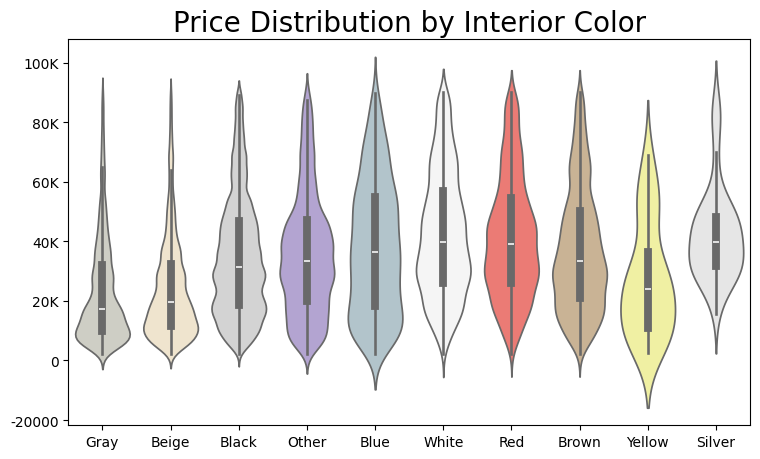

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

pastel_colors = [
    '#CFCFC4',  # gray → warm pastel
    '#F5E6C8',  # beige → soft sand
    '#D3D3D3',  # black → light gray
    '#B19CD9',  # purple → lavender
    '#AEC6CF',  # blue → powder
    '#F5F5F5',  # white → off-white
    '#FF6961',  # red → coral
    '#D2B48C',  # brown → tan
    '#FDFD96',   # yellow → lemon
    '#E6E6E6',  # silver → light
]



# Violin plot
sns.violinplot(data=df_train, x='standardized_interior_color', y='price', ax=ax, palette=pastel_colors)
ax.set_title('Price Distribution by Interior Color')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', labelsize=10)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.tight_layout()
plt.show()

## Final Data Cleaning
To complete the data preparation process, we utilized utility functions provided by Professor Yuxiao Huang. These tools helped us efficiently perform additional cleaning tasks and finalize the dataset for modeling.



###Splitting Data
The code below shows how to divide the training data into training (80%) and validation (20%).

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:

# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,137210,15


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,34303,15


###Handling Uncommon Features

The code below finds common variables between the training, validation and test data.

In [ ]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,Brand Category
1,Model Category
2,Transmission
3,clean_title
4,cylinders
5,engine_size
6,fuel_type
7,horsepower
8,id
9,mileage


The code below finds features in the training data but not in the validation or test data.

In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature
0,price_category


The code below shows finds the features in the validation data but not in the training or test data.

In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature
0,price_category



The code below finds the features in the test data but not in the training or validation data.

In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


We have removed uncommon features across datasets.

In [ ]:
# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,id,model_year,mileage,fuel_type,clean_title,price,Brand Category,Transmission,horsepower,engine_size,cylinders,Model Category,standardized_external_color,standardized_interior_color
0,50302,2017,65000,Gasoline,Yes,32000,Regular,A/T,365.0,3.5,6.0,Normal,Black,Black
1,30796,2023,38360,Hybrid,Yes,39860,Luxury,A/T,NaN,NaN,NaN,Premium,Gray,Black
2,75431,2020,30554,NaN,Yes,7390,Luxury,A/T,NaN,1.3,NaN,Performance,Gray,Black
3,133466,2018,53550,NaN,Yes,46105,Luxury,A/T,518.0,NaN,NaN,Performance,Black,Black
4,155425,2020,17000,Gasoline,Yes,67900,Luxury,A/T,603.0,4.0,8.0,Performance,Gray,Gray


In [ ]:
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Print the first 5 rows of df_val
df_val.head()

,id,model_year,mileage,fuel_type,clean_title,price,Brand Category,Transmission,horsepower,engine_size,cylinders,Model Category,standardized_external_color,standardized_interior_color
0,159851,2013,96800,Gasoline,No,11000,Luxury,A/T,429.0,4.6,8.0,Normal,Gray,Black
1,121489,2013,68871,Gasoline,No,44400,Luxury,A/T,400.0,4.4,8.0,Normal,Gray,Gray
2,147891,2017,51335,Gasoline,Yes,30500,Luxury,A/T,302.0,3.5,6.0,Normal,Black,Black
3,47151,2018,64290,Gasoline,Yes,30510,Regular,A/T,NaN,2.5,NaN,Premium,Red,Black
4,106848,2005,40000,Gasoline,Yes,25000,Regular,A/T,285.0,4.8,8.0,Normal,White,Gray


In [ ]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,id,model_year,mileage,fuel_type,clean_title,Brand Category,Transmission,horsepower,engine_size,cylinders,Model Category,standardized_external_color,standardized_interior_color
0,188533,2015,98000,Gasoline,Yes,Luxury,A/T,240.0,2.0,4.0,Normal,White,Beige
1,188534,2020,9142,Hybrid,Yes,Luxury,A/T,395.0,3.0,6.0,Normal,Silver,Black
2,188535,2022,28121,Gasoline,Yes,Regular,A/T,NaN,3.5,NaN,Premium,White,Other
3,188536,2016,61258,Gasoline,Yes,Luxury,A/T,NaN,NaN,NaN,Performance,Yellow,Black
4,188537,2018,59000,Gasoline,Yes,Luxury,A/T,252.0,2.0,4.0,Premium,Gray,Black


### Handling identifiers

The code below combines the training, validation and test data.

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

The code below finds identifiers from data.

In [ ]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,id
0,50302
1,30796
2,75431
3,133466
4,155425


The code below removes identifiers from data.

In [ ]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,model_year,mileage,fuel_type,clean_title,price,Brand Category,Transmission,horsepower,engine_size,cylinders,Model Category,standardized_external_color,standardized_interior_color
0,2017,65000,Gasoline,Yes,32000,Regular,A/T,365.0,3.5,6.0,Normal,Black,Black
1,2023,38360,Hybrid,Yes,39860,Luxury,A/T,NaN,NaN,NaN,Premium,Gray,Black
2,2020,30554,NaN,Yes,7390,Luxury,A/T,NaN,1.3,NaN,Performance,Gray,Black
3,2018,53550,NaN,Yes,46105,Luxury,A/T,518.0,NaN,NaN,Performance,Black,Black
4,2020,17000,Gasoline,Yes,67900,Luxury,A/T,603.0,4.0,8.0,Performance,Gray,Gray


In [ ]:
# Print the first 5 rows of df_val
df_val.head()

,model_year,mileage,fuel_type,clean_title,price,Brand Category,Transmission,horsepower,engine_size,cylinders,Model Category,standardized_external_color,standardized_interior_color
0,2013,96800,Gasoline,No,11000,Luxury,A/T,429.0,4.6,8.0,Normal,Gray,Black
1,2013,68871,Gasoline,No,44400,Luxury,A/T,400.0,4.4,8.0,Normal,Gray,Gray
2,2017,51335,Gasoline,Yes,30500,Luxury,A/T,302.0,3.5,6.0,Normal,Black,Black
3,2018,64290,Gasoline,Yes,30510,Regular,A/T,NaN,2.5,NaN,Premium,Red,Black
4,2005,40000,Gasoline,Yes,25000,Regular,A/T,285.0,4.8,8.0,Normal,White,Gray


In [ ]:
# Print the first 5 rows of df_test
df_test.head()

,model_year,mileage,fuel_type,clean_title,Brand Category,Transmission,horsepower,engine_size,cylinders,Model Category,standardized_external_color,standardized_interior_color
0,2015,98000,Gasoline,Yes,Luxury,A/T,240.0,2.0,4.0,Normal,White,Beige
1,2020,9142,Hybrid,Yes,Luxury,A/T,395.0,3.0,6.0,Normal,Silver,Black
2,2022,28121,Gasoline,Yes,Regular,A/T,NaN,3.5,NaN,Premium,White,Other
3,2016,61258,Gasoline,Yes,Luxury,A/T,NaN,NaN,NaN,Performance,Yellow,Black
4,2018,59000,Gasoline,Yes,Luxury,A/T,252.0,2.0,4.0,Premium,Gray,Black


###Handling date time variables

The code below transforms date time variables into the following 6 datetime types:

year
month
day
hour
minute
second

In [ ]:
# Get the date time variables
datetime_vars = []

In [ ]:
# Call datetime_transformer on df_train
# See the implementation in pmlm_utilities.ipynb
df_train = datetime_transformer(df_train, datetime_vars)

# Print the first 5 rows of df_train
df_train.head()

,model_year,mileage,fuel_type,clean_title,price,Brand Category,Transmission,horsepower,engine_size,cylinders,Model Category,standardized_external_color,standardized_interior_color
0,2017,65000,Gasoline,Yes,32000,Regular,A/T,365.0,3.5,6.0,Normal,Black,Black
1,2023,38360,Hybrid,Yes,39860,Luxury,A/T,NaN,NaN,NaN,Premium,Gray,Black
2,2020,30554,NaN,Yes,7390,Luxury,A/T,NaN,1.3,NaN,Performance,Gray,Black
3,2018,53550,NaN,Yes,46105,Luxury,A/T,518.0,NaN,NaN,Performance,Black,Black
4,2020,17000,Gasoline,Yes,67900,Luxury,A/T,603.0,4.0,8.0,Performance,Gray,Gray


In [ ]:
# Call datetime_transformer on df_val
# See the implementation in pmlm_utilities.ipynb
df_val = datetime_transformer(df_val, datetime_vars)

# Print the first 5 rows of df_val
df_val.head()

,model_year,mileage,fuel_type,clean_title,price,Brand Category,Transmission,horsepower,engine_size,cylinders,Model Category,standardized_external_color,standardized_interior_color
0,2013,96800,Gasoline,No,11000,Luxury,A/T,429.0,4.6,8.0,Normal,Gray,Black
1,2013,68871,Gasoline,No,44400,Luxury,A/T,400.0,4.4,8.0,Normal,Gray,Gray
2,2017,51335,Gasoline,Yes,30500,Luxury,A/T,302.0,3.5,6.0,Normal,Black,Black
3,2018,64290,Gasoline,Yes,30510,Regular,A/T,NaN,2.5,NaN,Premium,Red,Black
4,2005,40000,Gasoline,Yes,25000,Regular,A/T,285.0,4.8,8.0,Normal,White,Gray


In [ ]:
# Call datetime_transformer on df_test
# See the implementation in pmlm_utilities.ipynb
df_test = datetime_transformer(df_test, datetime_vars)

# Print the first 5 rows of df_test
df_test.head()

,model_year,mileage,fuel_type,clean_title,Brand Category,Transmission,horsepower,engine_size,cylinders,Model Category,standardized_external_color,standardized_interior_color
0,2015,98000,Gasoline,Yes,Luxury,A/T,240.0,2.0,4.0,Normal,White,Beige
1,2020,9142,Hybrid,Yes,Luxury,A/T,395.0,3.0,6.0,Normal,Silver,Black
2,2022,28121,Gasoline,Yes,Regular,A/T,NaN,3.5,NaN,Premium,White,Other
3,2016,61258,Gasoline,Yes,Luxury,A/T,NaN,NaN,NaN,Performance,Yellow,Black
4,2018,59000,Gasoline,Yes,Luxury,A/T,252.0,2.0,4.0,Premium,Gray,Black


### Handling missing data


The code below combines the training, validation and test data.

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,standardized_interior_color,10
1,standardized_external_color,9
2,fuel_type,6
3,Model Category,3
4,Brand Category,3
5,clean_title,2
6,Transmission,2


The code below identifies variables with NaN, their proportion of NaN and data type.

In [ ]:
# Call nan_checker on df
df_nan = nan_checker(df)

df_nan

,var,proportion,dtype
0,price,0.417822,float64
1,cylinders,0.186707,float64
2,horsepower,0.163439,float64
3,engine_size,0.068325,float64
4,fuel_type,0.026059,object


In [ ]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64
1,object


The code below uses data type to select variables with missing values in the combined data.

In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'object'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,fuel_type,0.026059,object


In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss2 = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

df_miss2

,var,proportion,dtype
0,price,0.417822,float64
1,cylinders,0.186707,float64
2,horsepower,0.163439,float64
3,engine_size,0.068325,float64


###Separating the training, validation and test data
The code below separates the training, validation and test data.

In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,137210,13


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,34303,13


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,123093,13


###Imputing missing values
The code below uses the mode of a variable to impute its missing values.

In [ ]:
from sklearn.impute import SimpleImputer

if len(df_miss['var']) > 0:

    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

In [ ]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss2['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Impute the variables with missing values in df_train, df_val and df_test
    df_train[df_miss2['var']] = si.fit_transform(df_train[df_miss2['var']])
    df_val[df_miss2['var']] = si.transform(df_val[df_miss2['var']])
    df_test[df_miss2['var']] = si.transform(df_test[df_miss2['var']])

###Encoding the data

The code below combines the training, validation and test data.

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,int64
1,object
2,float64


The code below identifies categorical variables (whose data type is dtype) and their number of unique value.

In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,standardized_interior_color,10
1,standardized_external_color,9
2,fuel_type,5
3,Model Category,3
4,Brand Category,3
5,clean_title,2
6,Transmission,2


The code below encodes categorical features in the combined data.

In [ ]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(np.intersect1d(df.columns, df_cat['var']), [target]))

# Print the first 5 rows of df
df.head()



,model_year,mileage,price,horsepower,engine_size,cylinders,Brand Category_Exotic,Brand Category_Luxury,Brand Category_Regular,Model Category_Normal,...,standardized_interior_color_Beige,standardized_interior_color_Black,standardized_interior_color_Blue,standardized_interior_color_Brown,standardized_interior_color_Gray,standardized_interior_color_Other,standardized_interior_color_Red,standardized_interior_color_Silver,standardized_interior_color_White,standardized_interior_color_Yellow
0,2017,65000,32000.0,365.000000,3.500000,6.000000,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
1,2023,38360,39860.0,335.495445,3.773668,6.329088,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2020,30554,7390.0,335.495445,1.300000,6.329088,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
3,2018,53550,46105.0,518.000000,3.773668,6.329088,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2020,17000,67900.0,603.000000,4.000000,8.000000,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


The code below separates the training, validation and test data.

In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,137210,40


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,34303,40


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,123093,40


###Splitting the feature and target
The code below splits the feature and target.

In [ ]:
df_train

,model_year,mileage,price,horsepower,engine_size,cylinders,Brand Category_Exotic,Brand Category_Luxury,Brand Category_Regular,Model Category_Normal,...,standardized_interior_color_Beige,standardized_interior_color_Black,standardized_interior_color_Blue,standardized_interior_color_Brown,standardized_interior_color_Gray,standardized_interior_color_Other,standardized_interior_color_Red,standardized_interior_color_Silver,standardized_interior_color_White,standardized_interior_color_Yellow
0,2017,65000,32000.0,365.000000,3.500000,6.000000,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
1,2023,38360,39860.0,335.495445,3.773668,6.329088,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2020,30554,7390.0,335.495445,1.300000,6.329088,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
3,2018,53550,46105.0,518.000000,3.773668,6.329088,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2020,17000,67900.0,603.000000,4.000000,8.000000,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137205,2020,48000,38500.0,270.000000,3.500000,6.000000,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
137206,2014,106500,9500.0,308.000000,3.500000,6.000000,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
137207,2021,93400,37000.0,475.000000,6.700000,8.000000,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
137208,2006,116157,10000.0,230.000000,3.000000,6.000000,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [ ]:
df_train[target]

,price
0,32000.0
1,39860.0
2,7390.0
3,46105.0
4,67900.0
...,...
137205,38500.0
137206,9500.0
137207,37000.0
137208,10000.0


###Scaling the data

The code below standardizes the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

In [ ]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

# Data Modeling

For the data modeling, we implemented three different algorithms: Linear Regression, XGBoost, and LightGBM. Linear regression provides a simple and interpretable baseline model that helps us understand the overall linear relationships between features and the target price. XGBoost and LightGBM, both popular gradient boosting algorithms, were selected due to their strong performance in structured, tabular data and their ability to capture complex non-linear patterns.

To optimize model performance, we performed hyperparameter tuning using GridSearchCV. For each model, we defined pipelines and specific grids of hyperparameters to search over. Linear regression was tuned for whether to fit an intercept and whether to constrain coefficients to be positive. For XGBoost and LightGBM, we tuned the number of estimators, maximum depth, and learning rate. During the grid search process, each model’s best parameters and cross-validation scores were recorded, and the results were saved for further evaluation. Models were ranked based on their cross-validation R² scores to identify the best-performing approach.

###Getting the predefined split cross-validator

In [ ]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

###Creating the directory for the cv results produced by GridSearchCV

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/car_prices/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

###Tuning the hyperparameters
We have fine-tuned the hyperparameters of SGDRegressor and LinearRegression_MBGD using sklearn GridSearchCV as shown in the code below.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import os

#Define pipelines for all models
pipes = {
    'lr': Pipeline([('model', LinearRegression())]),
    'xgb': Pipeline([('model', XGBRegressor(random_state=42))]),
    'lgbm': Pipeline([('model', LGBMRegressor(random_state=42))])
}

#Define parameter grids
param_grids = {
    'lr': {
        'model__fit_intercept': [True, False],
        'model__positive': [True, False]
    },
    'xgb': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6],
        'model__learning_rate': [0.05, 0.1]
    },
    'lgbm': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6],
        'model__learning_rate': [0.05, 0.1]
    }
}

#GridSearch for each model
best_score_params_estimator_gs = []

for acronym in pipes:
    print(f"\n Running GridSearch for: {acronym.upper()}")

    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='r2',
                      n_jobs=2,
                      cv=5,
                      return_train_score=True)

    gs = gs.fit(X_train_val, y_train_val)

    # Append results
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Store CV results
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    important_columns = ['rank_test_score', 'mean_test_score', 'std_test_score',
                         'mean_train_score', 'std_train_score',
                         'mean_fit_time', 'std_fit_time',
                         'mean_score_time', 'std_score_time']

    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    os.makedirs('cv_results/GridSearchCV/', exist_ok=True)
    cv_results.to_csv(f'cv_results/GridSearchCV/{acronym}.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])



 Running GridSearch for: LR

 Running GridSearch for: XGB

 Running GridSearch for: LGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 171513, number of used features: 39
[LightGBM] [Info] Start training from score 32419.861072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

,best_score,best_param,best_estimator
0,0.637071,"{'model__learning_rate': 0.1, 'model__max_dept...","(XGBRegressor(base_score=None, booster=None, c..."
1,0.636739,"{'model__learning_rate': 0.1, 'model__max_dept...","(LGBMRegressor(max_depth=6, n_estimators=200, ..."
2,0.560184,"{'model__fit_intercept': True, 'model__positiv...",(LinearRegression())


After running GridSearchCV, we found that XGBoost achieved the highest cross-validation R² score at 0.6371, closely followed by LightGBM at 0.6367. Linear regression performed noticeably worse, with a cross-validation R² score of 0.5602, reflecting its limitations in capturing the more complex relationships present in the data. For XGBoost and LightGBM, the best hyperparameters included using around 200 estimators, a maximum tree depth of 6, and a learning rate of 0.05, allowing the models to balance fitting the data while avoiding overfitting. For linear regression, the best settings involved fitting an intercept and allowing both positive and negative coefficients. Overall, the results show that gradient boosting models like XGBoost and LightGBM are much better suited for predicting used car prices in this dataset than a simple linear approach. Below is the result visualized in a graph.

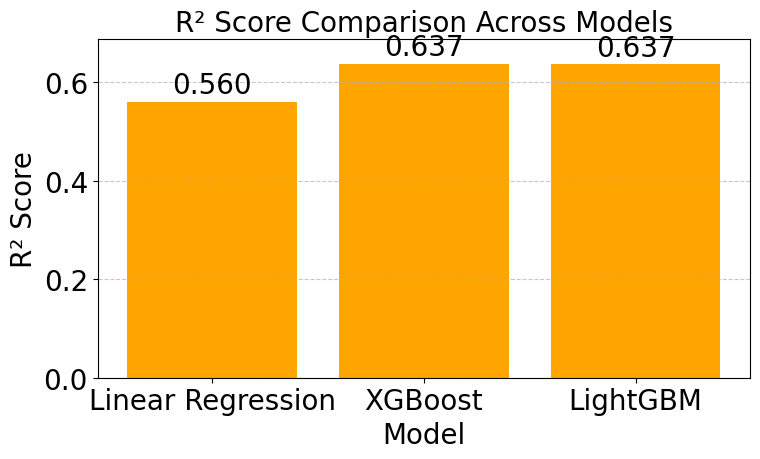

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace these values with your actual GridSearchCV R² scores
data = {
    'Model': ['Linear Regression', 'XGBoost', 'LightGBM'],
    'R2 Score': [0.560184, 0.637071, 0.636739]}

# Create DataFrame
df_results = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(df_results['Model'], df_results['R2 Score'], color='orange')
plt.title('R² Score Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.ylim(0, max(df_results['R2 Score']) + 0.05)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.005, f'{height:.3f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Model Selection

Here we have selected the best model that will be later used to generate the submission file for this kaggle competition.

In [ ]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [ ]:
best_score_params_estimator_gs[0]

[np.float64(0.6370711423165742),
 {'model__learning_rate': 0.1,
  'model__max_depth': 6,
  'model__n_estimators': 200},
 Pipeline(steps=[('model',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
         

# Feature Importance

After selecting the best-performing model from our hyperparameter tuning, we used the XGBoost model to examine feature importance. The feature importance values show which variables the model relied on the most when predicting car prices. As expected, model_year stands out as the most influential feature, with an importance score of 0.463, indicating that newer cars generally command higher prices. mileage follows next with a score of 0.147, aligning with the intuition that cars with more miles tend to be less expensive. horsepower also plays a noticeable role, contributing 0.067 to the prediction. In addition to these, categorical features such as Brand Category_Regular and Brand Category_Exotic appear important, reflecting the significant impact of a vehicle’s brand positioning on its market value. Other features like engine_size, fuel_type_Diesel, and cylinders have smaller but non-negligible influence. Overall, these results highlight that both the car’s basic physical characteristics and branding elements are critical drivers of price according to the XGBoost model.

## Creating the directory for the figures

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/result/car_price/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Getting the feature importance detected by xgboost

In [ ]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head(10)

,Features,Importance
0,model_year,0.463107
1,mileage,0.14705
2,horsepower,0.066828
3,Brand Category_Regular,0.053584
4,Brand Category_Exotic,0.028447
5,engine_size,0.026436
6,fuel_type_Diesel,0.015351
7,cylinders,0.014172
8,clean_title_No,0.014138
9,Model Category_Premium,0.010726


## Plotting the Feature Importance

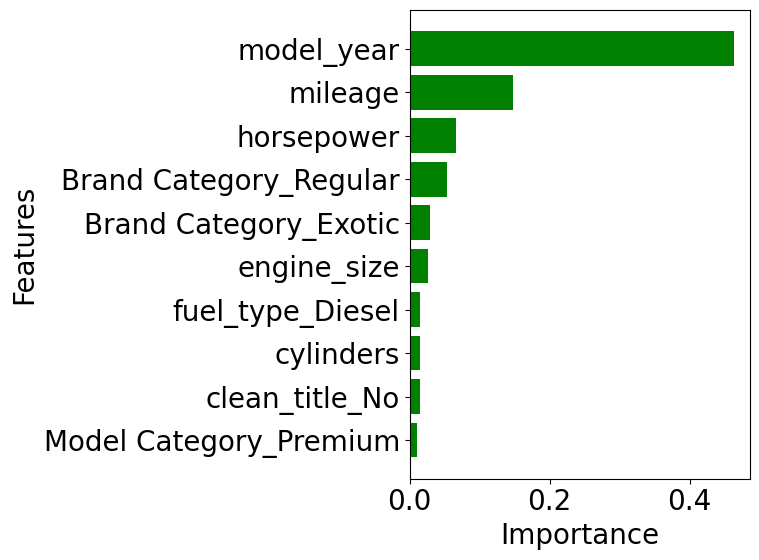

In [ ]:
# Sort the DataFrame by Importance in descending order
df_fi_rfc = df_fi_rfc.sort_values(by='Importance', ascending=False)

# Create a figure
fig = plt.figure(figsize=(8, 6))

# The horizontal bar plot of the top 5 feature importance
plt.barh(df_fi_rfc['Features'][:10], df_fi_rfc['Importance'][:10], color='green')

# Set y-axis
plt.ylabel('Features')

# Set x-axis
plt.xlabel('Importance')

# Invert y-axis so the most important feature is at the top
plt.gca().invert_yaxis()

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/car_price/figure/feature_importance_rfc.pdf')
plt.show()

# Clustering Analysis

In this analysis, we used the K-means clustering algorithm to segment the dataset based on key features, including price, mileage, horsepower, engine size, and model year. To determine the optimal number of clusters, we applied the elbow method, which suggested that three clusters provided the most meaningful segmentation.We selected the aforementioned features based on their importance in distinguishing between different vehicle types.

Before performing the clustering, we applied Principal Component Analysis (PCA) to reduce the dimensionality of the data and visualize the relationships between the features. The PCA transformation helped simplify the data, but the scatterplot of the first two principal components exhibited a somewhat dense and overlapping distribution of data points. This distribution suggests that, while the data is compressed into two dimensions, the clusters are not clearly distinct in this reduced space. This implies that the high-dimensional features likely have complex interactions that aren't fully captured by just the first two principal components, leading to a concentrated or merged appearance in the plot.

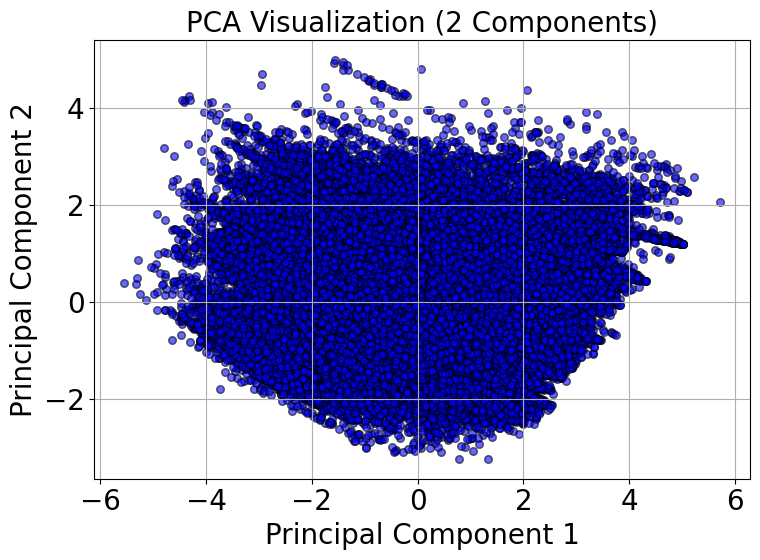

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select only key continuous features
key_features = ['price', 'mileage', 'horsepower', 'engine_size', 'model_year']
df_train_key = df_train[key_features].copy()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_train_key)

# PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Visualize the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c='blue', edgecolors='k', s=30)
plt.title('PCA Visualization (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

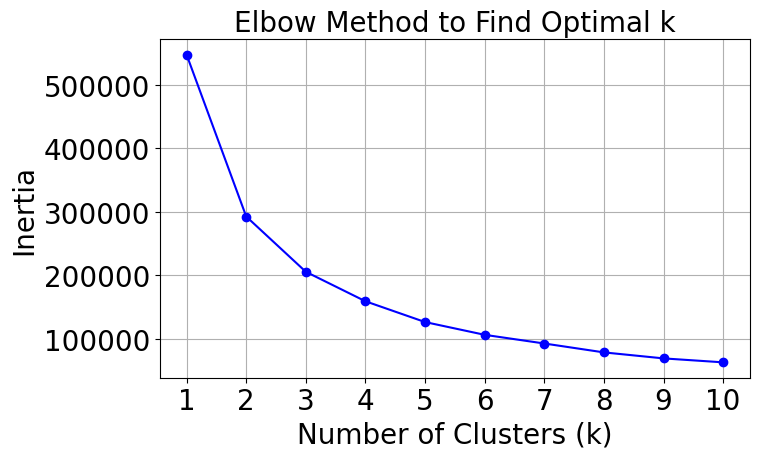

In [ ]:
# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

The resulting clusters can be summarized as follows:

1. Cluster 0: High-priced vehicles with lower mileage and higher horsepower. These vehicles are newer (mean model year 2017) and generally have larger engines (mean engine size 5.30). Price and horsepower were key drivers in defining this cluster, as luxury or high-performance cars tend to be more expensive and offer better performance. This cluster represents luxury or high-performance cars, which are newer, well-maintained, and more expensive.

2. Cluster 1:Low-priced vehicles with high mileage and lower horsepower. These vehicles are older (mean model year 2010) and have smaller engines (mean engine size 3.53). Mileage and price were significant for this cluster, as older, high-mileage vehicles tend to be cheaper and less powerful. This cluster represents budget or used cars, which are older, more worn, and generally less expensive, with lower performance metrics.

3. Cluster 2:Vehicles with moderate prices and moderate mileage. These vehicles are relatively newer (mean model year 2019) and have moderate horsepower (mean 324) and engine size (mean 3.07). Model year and price were the most important features for this cluster, reflecting the balance between affordability and performance in mid-range cars. This cluster represents mid-range cars, which are newer but not as expensive or high-performing as those in Cluster 0.

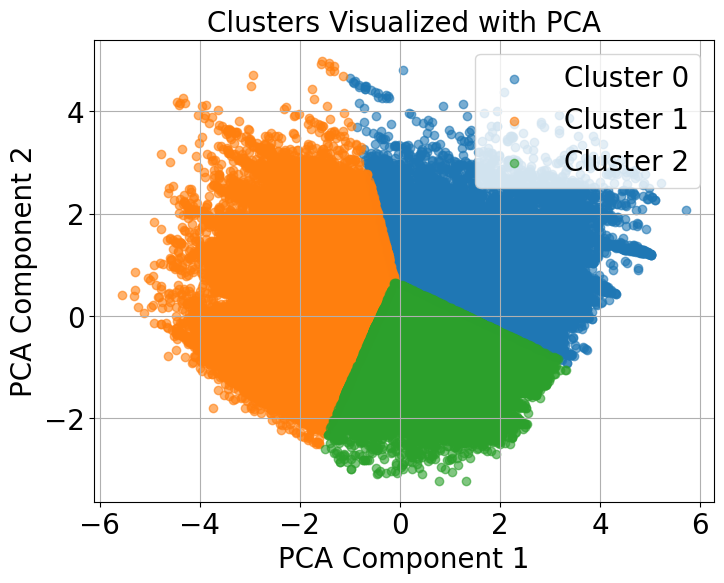

In [ ]:
# Choose number of clusters
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans_final.fit_predict(X_pca)

# Add cluster labels to original dataframe
df_train_key['cluster'] = clusters

# Visualize PCA clustering
plt.figure(figsize=(8, 6))
for cluster_label in np.unique(clusters):
    plt.scatter(X_pca[clusters == cluster_label, 0],
                X_pca[clusters == cluster_label, 1],
                label=f'Cluster {cluster_label}', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualized with PCA')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Show summary statistics per cluster
summary_stats = df_train_key.groupby('cluster').agg(['mean', 'median', 'count'])

# Convert to DataFrame
summary_df = pd.DataFrame(summary_stats)


# Transpose for better visualization
summary_df = summary_df.T

# Round the values to 2 decimal places and convert to string for clean display
summary_df = summary_df.applymap(lambda x: f"{x:.2f}")

# Set display options for better visibility
pd.set_option('display.colheader_justify', 'center')  # Center align column headers

# Display the table with some basic formatting (no green, neutral header style)
styled_df = summary_df.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f0f0f0'),  # Light gray background
                                       ('color', 'black'),
                                       ('font-weight', 'bold')]},  # Header styling
     {'selector': 'tbody td', 'props': [('text-align', 'center')]},  # Cell styling
     {'selector': 'thead', 'props': [('border-bottom', '2px solid black')]},  # Border below header
     {'selector': 'tbody', 'props': [('border', '1px solid black')]}]  # Border around table
)

# Display the styled table
styled_df

# Conclusion


This study aimed to investigate the factors affecting used car prices, segmenting vehicles based on pricing-related features, and employing advanced machine learning techniques to predict prices. The primary focus was on understanding how car model year, mileage, engine size, and other factors influence prices and identifying clusters within the data.

The analysis revealed that car model year, mileage, and horsepower were the most significant features impacting car prices. Cars that are newer, have lower mileage, and larger horsepower generally command higher prices. Specifically, model year emerged as the most influential feature with a feature importance score of 0.4631, emphasizing the crucial role of a vehicle's age in determining its market value. Mileage and horsepower were also significant, with importance scores of 0.1471 and 0.0668, respectively, reflecting the importance of a vehicle's condition and performance in its pricing.

The analysis of car brand showed distinct price differences between categories. Exotic cars had the highest average prices, followed by luxury and regular brands. Violin plots illustrated that while the majority of cars across all categories were priced lower, the higher end of the price distribution expanded significantly in the exotic car category.

Furthermore, clustering analysis was employed to segment the data into meaningful groups. This process identified distinct clusters of vehicles, showcasing how used cars can be categorized based on features like pricing, age, and performance. The resulting clusters aligned with logical market segments—luxury, budget, and mid-range cars—which highlighted the diversity within the used car market.

For modeling, we applied the XGBoost algorithm to predict car prices based on these key features. The model achieved an R-squared value of 0.6371, demonstrating a strong correlation between the predicted and actual prices. This confirms the robustness of the model in capturing the relationship between car attributes and their prices.

In conclusion, this study provides a comprehensive understanding of the factors influencing used car prices, highlighting the importance of model year, mileage, horsepower, and brand. The clustering analysis revealed meaningful segments within the market, and the predictive models, particularly XGBoost, demonstrated strong performance in forecasting prices. These insights offer valuable implications for car dealerships, buyers, and sellers in making data-driven decisions in the used car market.

# References

Chan, W. (2024, January 29). *'Seismic shift': Driving unaffordable for many in US amid push toward SUVs*. The Guardian. https://www.theguardian.com/business/2024/jan/29/us-car-costs-insurance-unaffordable

Kaggle. (n.d.). *Playground Series S4E9: Regression of Used Car Prices*. Retrieved April 28, 2025, from https://www.kaggle.com/competitions/playground-series-s4e9/data

Najib, T. (2023). *Used Car Price Prediction Dataset*. Kaggle. Retrieved April 28, 2025, from https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset

Semuels, A. (2024, June 13).* Why car prices are finally falling*. Time. https://time.com/6988412/car-prices-falling/
